[*********************100%***********************]  1 of 1 completed


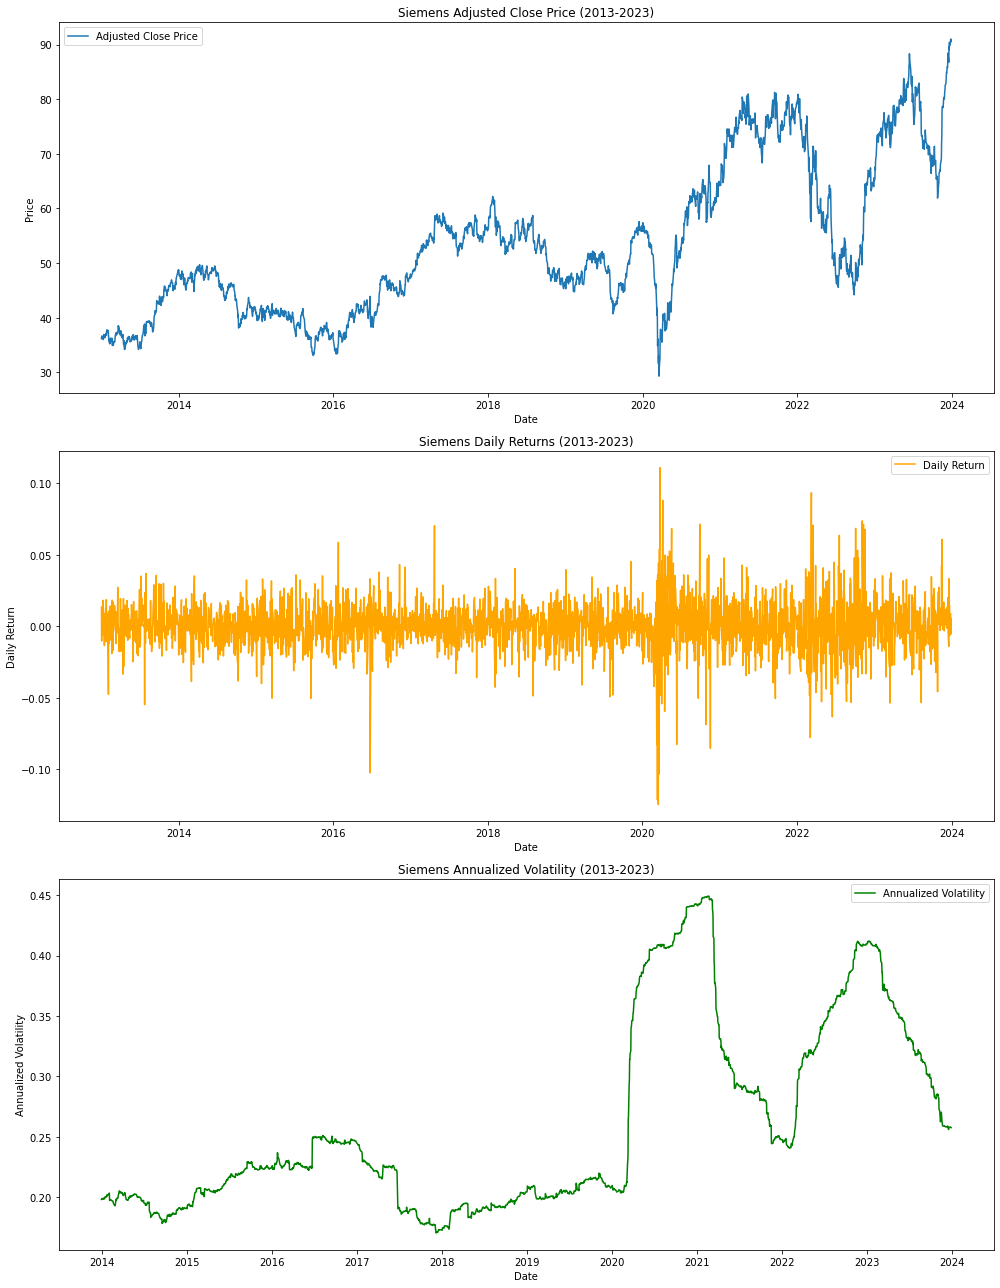

Summary Statistics for Siemens Stock (2013-2023):
   Mean Daily Return  Median Daily Return  \
0           0.000476             0.000579   

   Standard Deviation of Daily Returns  Annualized Volatility  
0                              0.01691               0.260438  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download Siemens stock data from Yahoo Finance
ticker = 'SIEGY'  # Siemens AG (ADR) ticker symbol
data = yf.download(ticker, start='2013-01-01', end='2023-12-31')

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate annualized volatility (standard deviation of daily returns scaled by sqrt(252))
data['Volatility'] = data['Daily Return'].rolling(window=252).std() * np.sqrt(252)

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(14, 18))

# Plot adjusted close price
ax[0].plot(data.index, data['Adj Close'], label='Adjusted Close Price')
ax[0].set_title('Siemens Adjusted Close Price (2013-2023)')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

# Plot daily returns
ax[1].plot(data.index, data['Daily Return'], label='Daily Return', color='orange')
ax[1].set_title('Siemens Daily Returns (2013-2023)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Daily Return')
ax[1].legend()

# Plot annualized volatility
ax[2].plot(data.index, data['Volatility'], label='Annualized Volatility', color='green')
ax[2].set_title('Siemens Annualized Volatility (2013-2023)')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Annualized Volatility')
ax[2].legend()

plt.tight_layout()
plt.show()

# Display summary statistics
summary_stats = {
    'Mean Daily Return': data['Daily Return'].mean(),
    'Median Daily Return': data['Daily Return'].median(),
    'Standard Deviation of Daily Returns': data['Daily Return'].std(),
    'Annualized Volatility': data['Volatility'].mean()
}

summary_stats_df = pd.DataFrame(summary_stats, index=[0])
print("Summary Statistics for Siemens Stock (2013-2023):")
print(summary_stats_df)
